<h4><center>"Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет)"</center></h4>
<h4><center>(МГТУ им. Н.Э. Баумана)</center></h4>
<br>
<center>Факультет "Фундаментальные науки"</center>
<br>
<center>Кафедра "Высшая математика"</center>
<br>
<br>
<h1><center>Методы оптимизации и вариационное исчисление</center></h1>
<br>
<br>
<h3><center>Отчёт</center></h3>
<center>по лабораторной работе №6</center>
<br>
<br>
<left>Выполнил: <h3>Черемисин Г.С.</h3></left>
<br>
<br>
<br>
<br>
<br>
<center>Москва, 2020</center>
<hr>

## Постановка задачи

Найти численное решение вариационной задачи с подвижными границами.
Решение представить в форме рисунка. 
$$\normalsize \begin{equation}
    \begin{cases}
        J(y)=\int_{a}^2{(x^2y'^2 - y'^2)}\,dx,\\
        y(a) = 2a + 1,\\
        y(2)=5.
    \end{cases}
\end{equation}$$

In [32]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Поле экстремалей

Определим понятие поля экстремалей. Семейство кривых $y=y(x,C)$ 
образует *собственное поле* в заданной области $D$ плоскости $Oxy$, если через каждую точку $(x,y)$ этой области проходит одна и только одна кривая семейства $y=y(x,C)$.

*Наклоном поля* в точке $(x,y)$ называется угловой коэффициент $p(x,y)$ касательной к кривой семейства $y=y(x,C)$, прохдящей через точку $(x,y)$.

Семейство кривых $y=y(x,C)$ образует *центральное поле* в области $D$ плоскости $Oxy$, если через каждую точку $(x,y)$, кроме некоторой точки $(x',y')\in D$, называемой *центром пучка кривых*,  проходит одна и только одна кривая семейства $y=y(x,C)$.

***Полем экстремалей*** называется такое собственное или центральное поле, которое образовано семейством экстремалей некоторой вариационной задачи, т.е. семейством интегральных кривых краевой задачи уравнения Эйлера
$$\normalsize \begin{equation}
    \begin{cases}
        F_y-\dfrac{d}{dx}F_{y'}=0,\\
        y(x_0)=y_0,\\
        y(x_1)=y_1.
    \end{cases}
    \end{equation}$$

## Нахождение экстремали и построение графика

In [40]:
x = sp.symbols('x')
y = sp.Function('y')
euler_eqantion = sp.Eq(sp.diff(sp.diff(x**2*(sp.diff(y(x), x))**2 + sp.diff(y(x), x), 
                                       sp.diff(y(x), x)), x) - sp.diff(x**2*(sp.diff(y(x), x))**2 + sp.diff(y(x), x), y(x)))

In [41]:
display('Уравнение Эйлера:', euler_eqantion)

'Уравнение Эйлера:'

Eq(2*x**2*Derivative(y(x), (x, 2)) + 4*x*Derivative(y(x), x), 0)

In [42]:
extr_field = sp.dsolve(euler_eqantion)
display('Полученое решение дифференциального уравнения:', extr_field)

'Полученое решение дифференциального уравнения:'

Eq(y(x), C1 + C2/x)

<font size = 3.5>Так как левая граница - подвижная, то для нее возникает условие трансверсальности, которое примет следующий вид:<br><br>
$$\normalsize f(x,y,y') + (\varphi'-y')f'_{y'} = 0,\; при \; x = a $$
<br>Для данного интегранта $\normalsize f(x, y, y')$ и граничного условия $\normalsize \varphi(x) = 2x + 1$, после соответствующих преобразований получим уравнение:<br>
$$\normalsize 4x^2y'-x^2y'^2+2=0,\; где\; x = a$$<br>
Вместе с этим условием два других краевых условия создают систему из трех уравнений:<br><br>
$$\normalsize \left\{
    \begin{array}\\
        -4c_1-\frac{c_1^2}{a^2}+2=0 \\
        \frac{c_1}{2} +c_2 = 5  \\
        \frac{c1}{a} + c_2 = 2a+1 \end{array}
\right.
$$
<br>В качестве решения получили следующие коэффициенты: $\normalsize c_1 = -\frac{7}{2};\; c_2 = \frac{27}{4};\; a = \frac{7}{8}$;<br>
Им соотвествует экстремаль $\normalsize y(x) = -\frac{7}{2x}+\frac{27}{4}$;<br>
<br>Отобразим поле и найденную экстремаль на графике

In [59]:
c10 = np.linspace(-8, 3, 10)
c1 = -7/2
c2 = 27/4
x_range = np.linspace(0.8, 2.5, 40)

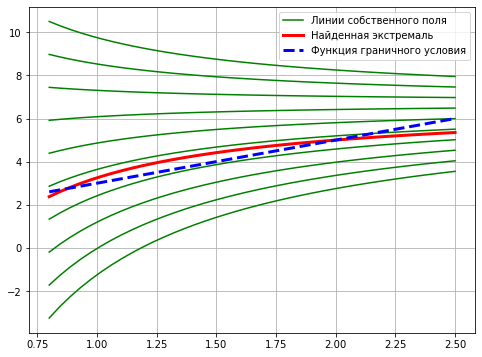

In [63]:
plt.figure(figsize = (8, 6))
for c in c10[:-1]:
    plt.plot(x_range, c/x_range+c2, color = 'green')

plt.plot(x_range, c10[-1]/x_range+c2, color = 'green', label='Линии собственного поля')
plt.plot(x_range, c1/x_range+c2, color = 'red', linewidth = 3, label = 'Найденная экстремаль')
plt.plot(x_range, 2*x_range+1, color='blue', linewidth = 3, label = 'Функция граничного условия', linestyle = '--')    

plt.legend()
plt.grid(True)
plt.show()

<font size = 3><i>Вывод: была найдена и отображена на графике экстремаль исходного функционала, удовлетворяющая граничным условиям 